In [66]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pylab import yticks
%matplotlib inline  

import seaborn as sns
sns.set_context('notebook')
sns.set_style('darkgrid')

pd.set_option('display.max_columns', 500)

### Data Overview

In [2]:
test_df = pd.read_csv("data/test.csv")
test_df.shape

(7662, 291)

In [3]:
train_df = pd.read_csv("data/train.csv")
train_df.shape

(30471, 292)

In [4]:
train_Y = train_df['price_doc']
train_df = train_df.drop(["id", "price_doc"], axis=1)

In [5]:
train_df.head()

,timestamp,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,state,product_type,sub_area,area_m,raion_popul,green_zone_part,indust_part,children_preschool,preschool_quota,preschool_education_centers_raion,children_school,school_quota,school_education_centers_raion,school_education_centers_top_20_raion,hospital_beds_raion,healthcare_centers_raion,university_top_20_raion,sport_objects_raion,additional_education_raion,culture_objects_top_25,culture_objects_top_25_raion,shopping_centers_raion,office_raion,thermal_power_plant_raion,incineration_raion,oil_chemistry_raion,radiation_raion,railroad_terminal_raion,big_market_raion,nuclear_reactor_raion,detention_facility_raion,full_all,male_f,female_f,young_all,young_male,young_female,work_all,work_male,work_female,ekder_all,ekder_male,ekder_female,0_6_all,0_6_male,0_6_female,7_14_all,7_14_male,7_14_female,0_17_all,0_17_male,0_17_female,16_29_all,16_29_male,16_29_female,0_13_all,0_13_male,0_13_female,raion_build_count_with_material_info,build_count_block,build_count_wood,build_count_frame,build_count_brick,build_count_monolith,build_count_panel,build_count_foam,build_count_slag,build_count_mix,raion_build_count_with_builddate_info,build_count_before_1920,build_count_1921-1945,build_count_1946-1970,build_count_1971-1995,build_count_after_1995,ID_metro,metro_min_avto,metro_km_avto,metro_min_walk,metro_km_walk,kindergarten_km,school_km,park_km,green_zone_km,industrial_km,water_treatment_km,cemetery_km,incineration_km,railroad_station_walk_km,railroad_station_walk_min,ID_railroad_station_walk,railroad_station_avto_km,railroad_station_avto_min,ID_railroad_station_avto,public_transport_station_km,public_transport_station_min_walk,water_km,water_1line,mkad_km,ttk_km,sadovoe_km,bulvar_ring_km,kremlin_km,big_road1_km,ID_big_road1,big_road1_1line,big_road2_km,ID_big_road2,railroad_km,railroad_1line,zd_vokzaly_avto_km,ID_railroad_terminal,bus_terminal_avto_km,ID_bus_terminal,oil_chemistry_km,nuclear_reactor_km,radiation_km,power_transmission_line_km,thermal_power_plant_km,ts_km,big_market_km,market_shop_km,fitness_km,swim_pool_km,ice_rink_km,stadium_km,basketball_km,hospice_morgue_km,detention_facility_km,public_healthcare_km,university_km,workplaces_km,shopping_centers_km,office_km,additional_education_km,preschool_km,big_church_km,church_synagogue_km,mosque_km,theater_km,museum_km,exhibition_km,catering_km,ecology,green_part_500,prom_part_500,office_count_500,office_sqm_500,trc_count_500,trc_sqm_500,cafe_count_500,cafe_sum_500_min_price_avg,cafe_sum_500_max_price_avg,cafe_avg_price_500,cafe_count_500_na_price,cafe_count_500_price_500,cafe_count_500_price_1000,cafe_count_500_price_1500,cafe_count_500_price_2500,cafe_count_500_price_4000,cafe_count_500_price_high,big_church_count_500,church_count_500,mosque_count_500,leisure_count_500,sport_count_500,market_count_500,green_part_1000,prom_part_1000,office_count_1000,office_sqm_1000,trc_count_1000,trc_sqm_1000,cafe_count_1000,cafe_sum_1000_min_price_avg,cafe_sum_1000_max_price_avg,cafe_avg_price_1000,cafe_count_1000_na_price,cafe_count_1000_price_500,cafe_count_1000_price_1000,cafe_count_1000_price_1500,cafe_count_1000_price_2500,cafe_count_1000_price_4000,cafe_count_1000_price_high,big_church_count_1000,church_count_1000,mosque_count_1000,leisure_count_1000,sport_count_1000,market_count_1000,green_part_1500,prom_part_1500,office_count_1500,office_sqm_1500,trc_count_1500,trc_sqm_1500,cafe_count_1500,cafe_sum_1500_min_price_avg,cafe_sum_1500_max_price_avg,cafe_avg_price_1500,cafe_count_1500_na_price,cafe_count_1500_price_500,cafe_count_1500_price_1000,cafe_count_1500_price_1500,cafe_count_1500_price_2500,cafe_count_1500_price_4000,cafe_count_1500_price_high,big_church_count_1500,church_count_1500,mosque_count_1500,leisure_count_1500,sport_count_1500,market_count_1500,green_part_2000,prom_part_2000,office_count_2000,office_sqm_2000,trc_count_2000,trc_sqm_2000,cafe_count_2000,cafe_sum_2000_min_price_avg,cafe_sum_2000_max_price_avg,c

In [6]:
test_df.head()

,id,timestamp,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,state,product_type,sub_area,area_m,raion_popul,green_zone_part,indust_part,children_preschool,preschool_quota,preschool_education_centers_raion,children_school,school_quota,school_education_centers_raion,school_education_centers_top_20_raion,hospital_beds_raion,healthcare_centers_raion,university_top_20_raion,sport_objects_raion,additional_education_raion,culture_objects_top_25,culture_objects_top_25_raion,shopping_centers_raion,office_raion,thermal_power_plant_raion,incineration_raion,oil_chemistry_raion,radiation_raion,railroad_terminal_raion,big_market_raion,nuclear_reactor_raion,detention_facility_raion,full_all,male_f,female_f,young_all,young_male,young_female,work_all,work_male,work_female,ekder_all,ekder_male,ekder_female,0_6_all,0_6_male,0_6_female,7_14_all,7_14_male,7_14_female,0_17_all,0_17_male,0_17_female,16_29_all,16_29_male,16_29_female,0_13_all,0_13_male,0_13_female,raion_build_count_with_material_info,build_count_block,build_count_wood,build_count_frame,build_count_brick,build_count_monolith,build_count_panel,build_count_foam,build_count_slag,build_count_mix,raion_build_count_with_builddate_info,build_count_before_1920,build_count_1921-1945,build_count_1946-1970,build_count_1971-1995,build_count_after_1995,ID_metro,metro_min_avto,metro_km_avto,metro_min_walk,metro_km_walk,kindergarten_km,school_km,park_km,green_zone_km,industrial_km,water_treatment_km,cemetery_km,incineration_km,railroad_station_walk_km,railroad_station_walk_min,ID_railroad_station_walk,railroad_station_avto_km,railroad_station_avto_min,ID_railroad_station_avto,public_transport_station_km,public_transport_station_min_walk,water_km,water_1line,mkad_km,ttk_km,sadovoe_km,bulvar_ring_km,kremlin_km,big_road1_km,ID_big_road1,big_road1_1line,big_road2_km,ID_big_road2,railroad_km,railroad_1line,zd_vokzaly_avto_km,ID_railroad_terminal,bus_terminal_avto_km,ID_bus_terminal,oil_chemistry_km,nuclear_reactor_km,radiation_km,power_transmission_line_km,thermal_power_plant_km,ts_km,big_market_km,market_shop_km,fitness_km,swim_pool_km,ice_rink_km,stadium_km,basketball_km,hospice_morgue_km,detention_facility_km,public_healthcare_km,university_km,workplaces_km,shopping_centers_km,office_km,additional_education_km,preschool_km,big_church_km,church_synagogue_km,mosque_km,theater_km,museum_km,exhibition_km,catering_km,ecology,green_part_500,prom_part_500,office_count_500,office_sqm_500,trc_count_500,trc_sqm_500,cafe_count_500,cafe_sum_500_min_price_avg,cafe_sum_500_max_price_avg,cafe_avg_price_500,cafe_count_500_na_price,cafe_count_500_price_500,cafe_count_500_price_1000,cafe_count_500_price_1500,cafe_count_500_price_2500,cafe_count_500_price_4000,cafe_count_500_price_high,big_church_count_500,church_count_500,mosque_count_500,leisure_count_500,sport_count_500,market_count_500,green_part_1000,prom_part_1000,office_count_1000,office_sqm_1000,trc_count_1000,trc_sqm_1000,cafe_count_1000,cafe_sum_1000_min_price_avg,cafe_sum_1000_max_price_avg,cafe_avg_price_1000,cafe_count_1000_na_price,cafe_count_1000_price_500,cafe_count_1000_price_1000,cafe_count_1000_price_1500,cafe_count_1000_price_2500,cafe_count_1000_price_4000,cafe_count_1000_price_high,big_church_count_1000,church_count_1000,mosque_count_1000,leisure_count_1000,sport_count_1000,market_count_1000,green_part_1500,prom_part_1500,office_count_1500,office_sqm_1500,trc_count_1500,trc_sqm_1500,cafe_count_1500,cafe_sum_1500_min_price_avg,cafe_sum_1500_max_price_avg,cafe_avg_price_1500,cafe_count_1500_na_price,cafe_count_1500_price_500,cafe_count_1500_price_1000,cafe_count_1500_price_1500,cafe_count_1500_price_2500,cafe_count_1500_price_4000,cafe_count_1500_price_high,big_church_count_1500,church_count_1500,mosque_count_1500,leisure_count_1500,sport_count_1500,market_count_1500,green_part_2000,prom_part_2000,office_count_2000,office_sqm_2000,trc_count_2000,trc_sqm_2000,cafe_count_2000,cafe_sum_2000_min_price_avg,cafe_sum_2000_max_price_av

Check instersection of train and test columns

In [7]:
set(train_df.columns) - set(test_df.columns)

set()

Check type correspondence

In [8]:
train_d = train_df.dtypes.to_dict()
test_d = test_df.dtypes.to_dict()
matching_dtypes = {key: (train_d[key], test_d[key]) for key in train_d.keys() 
                   if (train_d[key] != test_d[key])}
matching_dtypes

{'floor': (dtype('float64'), dtype('int64')),
 'full_sq': (dtype('int64'), dtype('float64')),
 'material': (dtype('float64'), dtype('int64')),
 'max_floor': (dtype('float64'), dtype('int64')),
 'num_room': (dtype('float64'), dtype('int64'))}

Make type conversion

In [9]:
train_df[['full_sq']] = train_df[['full_sq']].apply(pd.to_numeric, args=(('downcast','float')))
test_df[['floor', 'material', 'max_floor', 'num_room']] = test_df[['floor', 'material', 'max_floor', 'num_room']].apply(pd.to_numeric, args=(('downcast','float')))

Split categorical and numurical features

In [10]:
cols = train_df.columns
num_cols = train_df._get_numeric_data().columns
categorical_cols = list(set(cols) - set(num_cols))
categorical_cols.remove('timestamp')

In [11]:
train_df[num_cols].describe()

,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,state,area_m,raion_popul,green_zone_part,indust_part,children_preschool,preschool_quota,preschool_education_centers_raion,children_school,school_quota,school_education_centers_raion,school_education_centers_top_20_raion,hospital_beds_raion,healthcare_centers_raion,university_top_20_raion,sport_objects_raion,additional_education_raion,culture_objects_top_25_raion,shopping_centers_raion,office_raion,full_all,male_f,female_f,young_all,young_male,young_female,work_all,work_male,work_female,ekder_all,ekder_male,ekder_female,0_6_all,0_6_male,0_6_female,7_14_all,7_14_male,7_14_female,0_17_all,0_17_male,0_17_female,16_29_all,16_29_male,16_29_female,0_13_all,0_13_male,0_13_female,raion_build_count_with_material_info,build_count_block,build_count_wood,build_count_frame,build_count_brick,build_count_monolith,build_count_panel,build_count_foam,build_count_slag,build_count_mix,raion_build_count_with_builddate_info,build_count_before_1920,build_count_1921-1945,build_count_1946-1970,build_count_1971-1995,build_count_after_1995,ID_metro,metro_min_avto,metro_km_avto,metro_min_walk,metro_km_walk,kindergarten_km,school_km,park_km,green_zone_km,industrial_km,water_treatment_km,cemetery_km,incineration_km,railroad_station_walk_km,railroad_station_walk_min,ID_railroad_station_walk,railroad_station_avto_km,railroad_station_avto_min,ID_railroad_station_avto,public_transport_station_km,public_transport_station_min_walk,water_km,mkad_km,ttk_km,sadovoe_km,bulvar_ring_km,kremlin_km,big_road1_km,ID_big_road1,big_road2_km,ID_big_road2,railroad_km,zd_vokzaly_avto_km,ID_railroad_terminal,bus_terminal_avto_km,ID_bus_terminal,oil_chemistry_km,nuclear_reactor_km,radiation_km,power_transmission_line_km,thermal_power_plant_km,ts_km,big_market_km,market_shop_km,fitness_km,swim_pool_km,ice_rink_km,stadium_km,basketball_km,hospice_morgue_km,detention_facility_km,public_healthcare_km,university_km,workplaces_km,shopping_centers_km,office_km,additional_education_km,preschool_km,big_church_km,church_synagogue_km,mosque_km,theater_km,museum_km,exhibition_km,catering_km,green_part_500,prom_part_500,office_count_500,office_sqm_500,trc_count_500,trc_sqm_500,cafe_count_500,cafe_sum_500_min_price_avg,cafe_sum_500_max_price_avg,cafe_avg_price_500,cafe_count_500_na_price,cafe_count_500_price_500,cafe_count_500_price_1000,cafe_count_500_price_1500,cafe_count_500_price_2500,cafe_count_500_price_4000,cafe_count_500_price_high,big_church_count_500,church_count_500,mosque_count_500,leisure_count_500,sport_count_500,market_count_500,green_part_1000,prom_part_1000,office_count_1000,office_sqm_1000,trc_count_1000,trc_sqm_1000,cafe_count_1000,cafe_sum_1000_min_price_avg,cafe_sum_1000_max_price_avg,cafe_avg_price_1000,cafe_count_1000_na_price,cafe_count_1000_price_500,cafe_count_1000_price_1000,cafe_count_1000_price_1500,cafe_count_1000_price_2500,cafe_count_1000_price_4000,cafe_count_1000_price_high,big_church_count_1000,church_count_1000,mosque_count_1000,leisure_count_1000,sport_count_1000,market_count_1000,green_part_1500,prom_part_1500,office_count_1500,office_sqm_1500,trc_count_1500,trc_sqm_1500,cafe_count_1500,cafe_sum_1500_min_price_avg,cafe_sum_1500_max_price_avg,cafe_avg_price_1500,cafe_count_1500_na_price,cafe_count_1500_price_500,cafe_count_1500_price_1000,cafe_count_1500_price_1500,cafe_count_1500_price_2500,cafe_count_1500_price_4000,cafe_count_1500_price_high,big_church_count_1500,church_count_1500,mosque_count_1500,leisure_count_1500,sport_count_1500,market_count_1500,green_part_2000,prom_part_2000,office_count_2000,office_sqm_2000,trc_count_2000,trc_sqm_2000,cafe_count_2000,cafe_sum_2000_min_price_avg,cafe_sum_2000_max_price_avg,cafe_avg_price_2000,cafe_count_2000_na_price,cafe_count_2000_price_500,cafe_count_2000_price_1000,cafe_count_2000_price_1500,cafe_count_2000_price_2500,cafe_count_2000_price_4000,cafe_count_2000_price_high,big_church_count_2000,church_count_2000,mosque_count_2000,leisure_coun

In [12]:
test_df[num_cols].describe()

,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,state,area_m,raion_popul,green_zone_part,indust_part,children_preschool,preschool_quota,preschool_education_centers_raion,children_school,school_quota,school_education_centers_raion,school_education_centers_top_20_raion,hospital_beds_raion,healthcare_centers_raion,university_top_20_raion,sport_objects_raion,additional_education_raion,culture_objects_top_25_raion,shopping_centers_raion,office_raion,full_all,male_f,female_f,young_all,young_male,young_female,work_all,work_male,work_female,ekder_all,ekder_male,ekder_female,0_6_all,0_6_male,0_6_female,7_14_all,7_14_male,7_14_female,0_17_all,0_17_male,0_17_female,16_29_all,16_29_male,16_29_female,0_13_all,0_13_male,0_13_female,raion_build_count_with_material_info,build_count_block,build_count_wood,build_count_frame,build_count_brick,build_count_monolith,build_count_panel,build_count_foam,build_count_slag,build_count_mix,raion_build_count_with_builddate_info,build_count_before_1920,build_count_1921-1945,build_count_1946-1970,build_count_1971-1995,build_count_after_1995,ID_metro,metro_min_avto,metro_km_avto,metro_min_walk,metro_km_walk,kindergarten_km,school_km,park_km,green_zone_km,industrial_km,water_treatment_km,cemetery_km,incineration_km,railroad_station_walk_km,railroad_station_walk_min,ID_railroad_station_walk,railroad_station_avto_km,railroad_station_avto_min,ID_railroad_station_avto,public_transport_station_km,public_transport_station_min_walk,water_km,mkad_km,ttk_km,sadovoe_km,bulvar_ring_km,kremlin_km,big_road1_km,ID_big_road1,big_road2_km,ID_big_road2,railroad_km,zd_vokzaly_avto_km,ID_railroad_terminal,bus_terminal_avto_km,ID_bus_terminal,oil_chemistry_km,nuclear_reactor_km,radiation_km,power_transmission_line_km,thermal_power_plant_km,ts_km,big_market_km,market_shop_km,fitness_km,swim_pool_km,ice_rink_km,stadium_km,basketball_km,hospice_morgue_km,detention_facility_km,public_healthcare_km,university_km,workplaces_km,shopping_centers_km,office_km,additional_education_km,preschool_km,big_church_km,church_synagogue_km,mosque_km,theater_km,museum_km,exhibition_km,catering_km,green_part_500,prom_part_500,office_count_500,office_sqm_500,trc_count_500,trc_sqm_500,cafe_count_500,cafe_sum_500_min_price_avg,cafe_sum_500_max_price_avg,cafe_avg_price_500,cafe_count_500_na_price,cafe_count_500_price_500,cafe_count_500_price_1000,cafe_count_500_price_1500,cafe_count_500_price_2500,cafe_count_500_price_4000,cafe_count_500_price_high,big_church_count_500,church_count_500,mosque_count_500,leisure_count_500,sport_count_500,market_count_500,green_part_1000,prom_part_1000,office_count_1000,office_sqm_1000,trc_count_1000,trc_sqm_1000,cafe_count_1000,cafe_sum_1000_min_price_avg,cafe_sum_1000_max_price_avg,cafe_avg_price_1000,cafe_count_1000_na_price,cafe_count_1000_price_500,cafe_count_1000_price_1000,cafe_count_1000_price_1500,cafe_count_1000_price_2500,cafe_count_1000_price_4000,cafe_count_1000_price_high,big_church_count_1000,church_count_1000,mosque_count_1000,leisure_count_1000,sport_count_1000,market_count_1000,green_part_1500,prom_part_1500,office_count_1500,office_sqm_1500,trc_count_1500,trc_sqm_1500,cafe_count_1500,cafe_sum_1500_min_price_avg,cafe_sum_1500_max_price_avg,cafe_avg_price_1500,cafe_count_1500_na_price,cafe_count_1500_price_500,cafe_count_1500_price_1000,cafe_count_1500_price_1500,cafe_count_1500_price_2500,cafe_count_1500_price_4000,cafe_count_1500_price_high,big_church_count_1500,church_count_1500,mosque_count_1500,leisure_count_1500,sport_count_1500,market_count_1500,green_part_2000,prom_part_2000,office_count_2000,office_sqm_2000,trc_count_2000,trc_sqm_2000,cafe_count_2000,cafe_sum_2000_min_price_avg,cafe_sum_2000_max_price_avg,cafe_avg_price_2000,cafe_count_2000_na_price,cafe_count_2000_price_500,cafe_count_2000_price_1000,cafe_count_2000_price_1500,cafe_count_2000_price_2500,cafe_count_2000_price_4000,cafe_count_2000_price_high,big_church_count_2000,church_count_2000,mosque_count_2000,leisure_coun

In [13]:
train_df[categorical_cols].describe()

,water_1line,ecology,big_market_raion,big_road1_1line,incineration_raion,thermal_power_plant_raion,product_type,railroad_1line,radiation_raion,sub_area,oil_chemistry_raion,railroad_terminal_raion,detention_facility_raion,nuclear_reactor_raion,culture_objects_top_25
count,30471,30471,30471,30471,30471,30471,30471,30471,30471,30471,30471,30471,30471,30471,30471
unique,2,5,2,2,2,2,2,2,2,146,2,2,2,2,2
top,no,poor,no,no,no,no,Investment,no,no,Poselenie Sosenskoe,no,no,no,no,no
freq,28134,8018,27649,29690,28155,28817,19448,29578,19600,1776,30175,29335,27427,29608,28543


In [14]:
test_df[categorical_cols].describe()

,water_1line,ecology,big_market_raion,big_road1_1line,incineration_raion,thermal_power_plant_raion,product_type,railroad_1line,radiation_raion,sub_area,oil_chemistry_raion,railroad_terminal_raion,detention_facility_raion,nuclear_reactor_raion,culture_objects_top_25
count,7662,7662,7662,7662,7662,7662,7629,7662,7662,7662,7662,7662,7662,7662,7662
unique,2,5,2,2,2,2,2,2,2,145,2,2,2,2,2
top,no,poor,no,no,no,no,Investment,no,no,Poselenie Vnukovskoe,no,no,no,no,no
freq,7104,2060,7130,7339,7396,7248,4998,7423,4864,584,7597,7344,6876,7413,6971


Count missing values

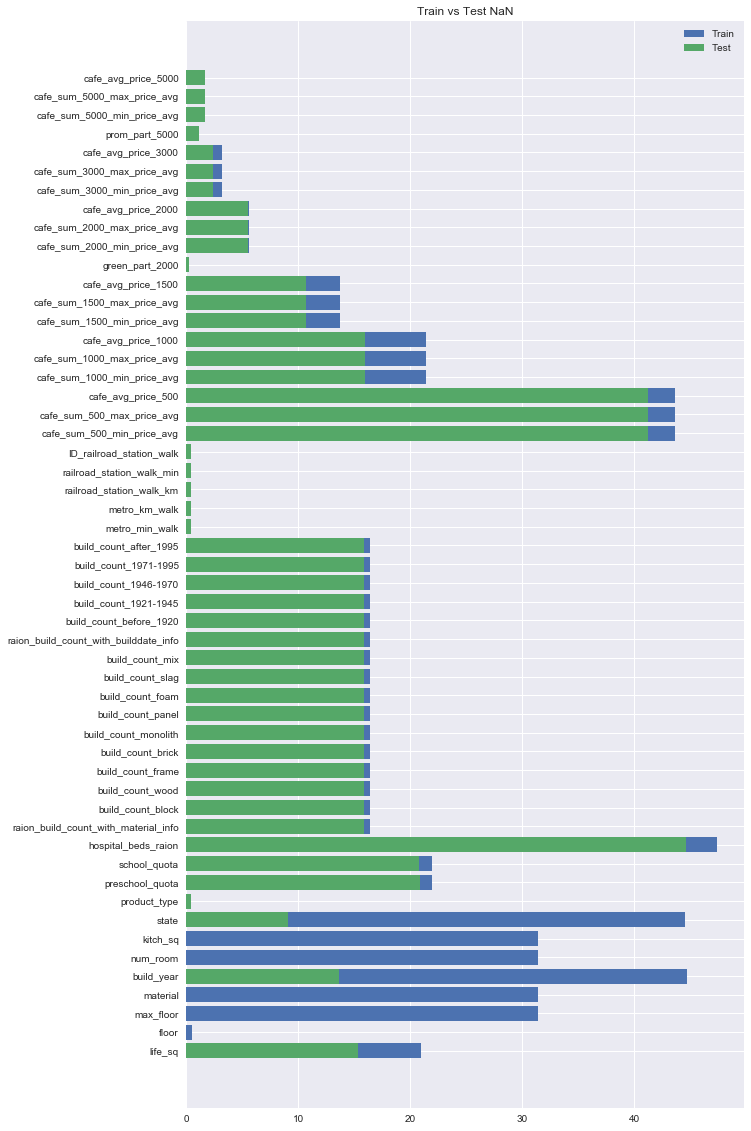

In [83]:
missing_count_train = (train_df.isnull().sum() / train_df.shape[0]).to_dict()
missing_count_test = (test_df.isnull().sum() / test_df.shape[0]).to_dict()
missing_all = {key: (value, missing_count_test[key]) for key, value in missing_count_train.items() 
       if not (value == 0.0 and missing_count_test[key] == 0)}

ticks, missing_train, missing_test = [], [], []
for key, data_list in new.items():    
    train, test = data_list
    missing_train.append(train * 100.0)
    missing_test.append(test * 100.0)
    ticks.append(key)
    
ind = np.arange(len(ticks))
fig, ax = plt.subplots()
fig.set_size_inches(10, 20)
ax.set_title("Train vs Test NaN")

barh1 = ax.barh(ind, missing_train)
barh2 = ax.barh(ind, missing_test)
ax.legend((barh1[0], barh2[0]), ('Train', 'Test'))
yticks(ind, ticks);


QQ-plot for target

((array([-4.07764062, -3.86644899, -3.75109077, ...,  3.75109077,
          3.86644899,  4.07764062]),
  array([ 11.51293546,  12.15478461,  12.20607765, ...,  18.32709614,
          18.37067606,  18.52604128])),
 (0.58651573976941329, 15.609483171522076, 0.97001952755917309))

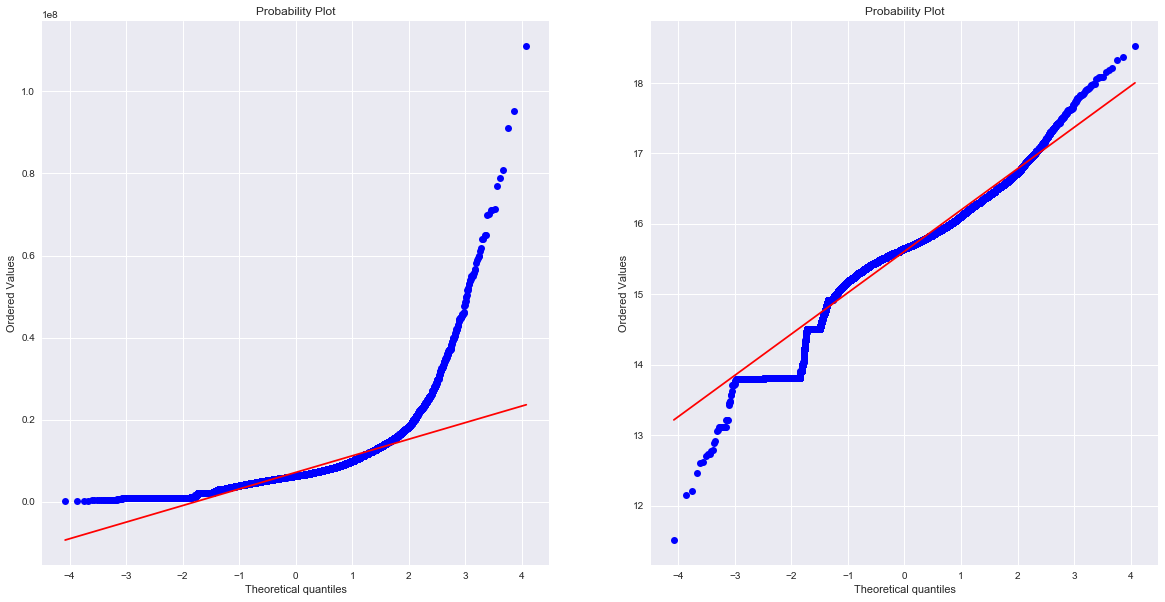

In [28]:
from scipy import stats
fig,axes = plt.subplots(ncols=2)
fig.set_size_inches(20, 10)
stats.probplot(train_Y, plot=axes[0])
stats.probplot(np.log1p(train_Y), plot=axes[1])

Relationship price with some categorical features

In [ ]:
var = 'floor'
data = pd.concat([train_df['price_doc'], train_df[var]], axis=1)
f, ax = plt.subplots(figsize=(16, 10))
f.suptitle('Floor vs Price', size=16)
fig = sns.boxplot(x=var, y="price_doc", data=data)

In [ ]:
var = 'num_room'
data = pd.concat([train_df['price_doc'], train_df[var]], axis=1)
f, ax = plt.subplots(figsize=(16, 10))
f.suptitle('Number of living rooms vs Price', size=16)
fig = sns.boxplot(x=var, y="price_doc", data=data)

### Data Preparation

It's better to encode categorical features. I use label encoding, but I'm not sure that it's the best practice for such task.

In [ ]:
from sklearn.preprocessing import LabelEncoder
from collections import defaultdict
dict_encoder = defaultdict(LabelEncoder)

for col in categorical_cols:    
    train_df[col] = dict_encoder[col].fit_transform(train_df[col])

In [ ]:
train_X = train_df.drop(["id", "timestamp", "price_doc"], axis=1)
train_y = train_df.price_doc.values

There are a lot of NaN values we should clean them before start to proccessing

In [ ]:
from sklearn.preprocessing import Imputer
imp = Imputer(missing_values='NaN', strategy='median', axis=0)
train_X = imp.fit_transform(train_X)

We have too much features, let's try to find most important without cumbersome graphics  
http://scikit-learn.org/stable/modules/feature_selection.html#l1-based-feature-selection

In [ ]:
from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectFromModel

In [ ]:
lasso = Lasso()
model = lasso.fit(train_X, train_y)

In [ ]:
select_model = SelectFromModel(lasso, prefit=True)

In [ ]:
train_X_new = select_model.transform(train_X)

In [ ]:
train_X_new.shape

In [ ]:
train_X.shape

I can't reduce dimension using this method. I've also tried to use "Tree-based feature selection" but it takes all memory. Without doubt there are exist some pretty methods for reduce dimension but it's not my main aim. I just want to meet with main methods of ML which are mentioned in Andrew Ng course. That's why I take important features from this kernel:
https://www.kaggle.com/sudalairajkumar/simple-exploration-notebook-sberbank

In [ ]:
important_features = ['full_sq', 'life_sq', 'floor', 'max_floor', 'build_year', 'kitch_sq', 'state']
train_df = train_df[important_features]

Look at selected features from NaN point of view

In [ ]:
missing_count = (train_df.isnull().sum() / train_df.shape[0]) * 100.0
missing_count.sort_values(ascending=False)

Replace NaN

In [ ]:
from sklearn.preprocessing import Imputer
imp = Imputer(missing_values='NaN', strategy='median', axis=0)
train_X = imp.fit_transform(train_df)

Standardize features by removing the mean and scaling to unit variance

In [ ]:
from sklearn.preprocessing import StandardScaler
train_X = StandardScaler().fit_transform(train_X.copy())

### Make metric

In [ ]:
def rmsle(predicted, actual):
    return np.sqrt(np.nansum(np.square(np.log(predicted + 1) - np.log(actual + 1)))/float(len(actual)))

In [ ]:
from sklearn.metrics import make_scorer
scorer = make_scorer(rmsle, greater_is_better=False)

In [ ]:
from sklearn.model_selection import cross_val_score

In [ ]:
def rmsle_cv(model, X, y, scorer, cv=10):
    # https://stackoverflow.com/questions/19993711/negative-value-for-mean-squared-error
    rmsle = -cross_val_score(model, X=X, y=y, scoring=scorer, cv=cv)
    return(rmsle)

### Submission Function

In [ ]:
def make_sub(filename, predictions):
    df = pd.DataFrame({'id' : range(30474, 38136), 'price_doc' : np.round(predictions, 2)})
    df.to_csv(filename + '.csv', sep=',', index=False, line_terminator='\n', encoding='utf-8')

### Linear Regression without regularization

In [ ]:
from sklearn import linear_model
reg = linear_model.LinearRegression(n_jobs=-1)
reg.fit(train_X, train_y)

In [ ]:
print('Coefficients: \n', reg.coef_)

In [ ]:
train_y_pred = reg.predict(train_X)
print('RMSLE on Training set :', rmsle(train_y_pred, train_y))

In [ ]:
print("CV RMSLE on Training set :", rmsle_cv(model=reg, X=train_X, y=train_y, scorer=scorer))

Predict test

In [ ]:
test_df = test_df[important_features]
test_X = imp.fit_transform(test_df)
test_X = StandardScaler().fit_transform(test_X.copy())

In [ ]:
test_y_pred = reg.predict(test_X)

In [ ]:
fig, ax = plt.subplots(figsize=(15, 6))
indexes = list(range(len(train_y)))
plt.scatter(indexes, train_y, label = "Training data", c='red')
plt.scatter(indexes, train_y_pred, label = "Predicted data", c='indigo');

In [ ]:
make_sub(filename='linear_regr', predictions=test_y_pred)

##### Public Submission Score: 0.41055

---

### Linear Regression with Lasso Regularization (L1 - penalty)

In [ ]:
reg_lasso = linear_model.Lasso(alpha = 0.1)
reg_lasso.fit(train_X, train_y)

In [ ]:
print('Coefficients: \n', reg_lasso.coef_)

In [ ]:
print('Coefficients (Difference): \n', reg_lasso.coef_ - reg.coef_)

In [ ]:
train_y_pred_lasso = reg_lasso.predict(train_X)
print('RMSLE on Training set :', rmsle(train_y_pred_lasso, train_y))

In [ ]:
print('RMSLE on Training set (Difference):', rmsle(train_y_pred, train_y) - rmsle(train_y_pred_lasso, train_y))

In [ ]:
print("CV RMSLE on Training set :", rmsle_cv(model=reg_lasso, X=train_X, y=train_y, scorer=scorer))

In [ ]:
print("CV RMSLE on Training set (Difference):", 
      rmsle_cv(model=reg_lasso, X=train_X, y=train_y, scorer=scorer) - 
      rmsle_cv(model=reg, X=train_X, y=train_y, scorer=scorer))

We can observe a very small difference between Linear Regression models with or without L1.  
I suppose we should to optimize alpha parameter of L1 regulariztion.

In [ ]:
reg_lasso_cv = linear_model.LassoCV(n_alphas=1000, max_iter=1000, cv=10)

In [ ]:
reg_lasso_cv.fit(train_X, train_y)

In [ ]:
reg_lasso_cv.alpha_

In [ ]:
reg_lasso_cv.coef_

In [ ]:
print('Coefficients (Difference): \n', reg_lasso.coef_ - reg_lasso_cv.coef_)

In [ ]:
train_y_pred_lasso_cv = reg_lasso_cv.predict(train_X)
print('RMSLE on Training set :', rmsle(train_y_pred_lasso_cv, train_y))

In [ ]:
print('RMSLE on Training set (Difference):', rmsle(train_y_pred_lasso_cv, train_y) - rmsle(train_y_pred_lasso, train_y))

In [ ]:
print("CV RMSLE on Training set :", rmsle_cv(model=reg_lasso_cv, X=train_X, y=train_y, scorer=scorer))

In [ ]:
print("CV RMSLE on Training set (Difference):", 
      rmsle_cv(model=reg_lasso_cv, X=train_X, y=train_y, scorer=scorer) - 
      rmsle_cv(model=reg_lasso, X=train_X, y=train_y, scorer=scorer))

Predict test

In [ ]:
test_y_pred_lasso_cv = reg_lasso_cv.predict(test_X)

In [ ]:
fig, ax = plt.subplots(figsize=(15, 6))
indexes = list(range(len(train_y)))
plt.scatter(indexes, train_y, label = "Training data", c='red')
plt.scatter(indexes, train_y_pred_lasso_cv, label = "Predicted data", c='indigo');

In [ ]:
make_sub(filename='linear_regr_lasso_cv', predictions=test_y_pred_lasso_cv)

##### Public Submission Score: 0.50625
Predictably, we get worse result in comparison with simple Linear Regression. Because we use only one feature. I suppose it's better to apply L1 regularization to full set of features. However, I don't want to become cowboy (Lasso Master). Therefore, I'll go futher.

### Linear Regression with Ridge Regularization (L2 - penalty)

In [ ]:
alphas = [0.01, 0.03, 0.06, 0.1, 0.3, 0.6, 1, 3, 6, 10, 30, 60, 100]
reg_ridge_cv = linear_model.RidgeCV(alphas=alphas, cv=10)
reg_ridge_cv.fit(train_X, train_y)

In [ ]:
print('Coefficients (Difference): \n', reg.coef_ - reg_ridge_cv.coef_)

In [ ]:
train_y_pred_ridge_cv = reg_ridge_cv.predict(train_X)
print('RMSLE on Training set :', rmsle(train_y_pred_ridge_cv, train_y))

In [ ]:
print('RMSLE on Training set (Difference):', rmsle(train_y_pred, train_y) - rmsle(train_y_pred_ridge_cv, train_y))

In [ ]:
print("CV RMSLE on Training set (Difference):", 
      rmsle_cv(model=reg, X=train_X, y=train_y, scorer=scorer) - 
      rmsle_cv(model=reg_ridge_cv, X=train_X, y=train_y, scorer=scorer))

Predict test

In [ ]:
test_y_pred_ridge_cv = reg_ridge_cv.predict(test_X)

In [ ]:
fig, ax = plt.subplots(figsize=(15, 6))
indexes = list(range(len(train_y)))
plt.scatter(indexes, train_y, label = "Training data", c='red')
plt.scatter(indexes, train_y_pred_ridge_cv, label = "Predicted data", c='indigo');

In [ ]:
make_sub(filename='linear_regr_ridge_cv', predictions=test_y_pred_ridge_cv)

##### Public Submission Score: 0.41069
The PLB score is very close to Linear Regression model without any regularization. Also, we should take into consideration that there isn't signifacant change of score on train data, according to RMLSE metric. Thus, selection of parameters is the room for improvement. However, I want to explore more machine learning algorthms. Like I said, my main aim for this competition isn't rewards but obtaining initial expertise in learning process.

### Decision Tree Regressor

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.grid_search import GridSearchCV

In [ ]:
parameters = {'max_depth':list(range(5, 20, 5)), 'min_samples_split':list(range(100, 150, 10)), 'min_samples_leaf':list(range(5, 20, 5))}

In [ ]:
dtr_cv = GridSearchCV(DecisionTreeRegressor(random_state=0), parameters, cv=50, n_jobs=4)

In [ ]:
imp = Imputer(missing_values='NaN', strategy='mean', axis=0)
train_X = imp.fit_transform(train_df)

In [ ]:
dtr_cv.fit(train_X, train_y)

In [ ]:
print (dtr_cv.best_score_, dtr_cv.best_params_)

In [ ]:
train_y_pred_dtr_cv = dtr_cv.predict(train_X)

In [ ]:
test_X = imp.fit_transform(test_df)

In [ ]:
test_y_pred_dtr_cv = dtr_cv.predict(test_X)

In [ ]:
fig, ax = plt.subplots(figsize=(15, 6))
indexes = list(range(len(train_y)))
plt.scatter(indexes, train_y, label = "Training data", c='red')
plt.scatter(indexes, train_y_pred_dtr_cv, label = "Predicted data", c='indigo');

In [ ]:
make_sub(filename='decission_tree_cv', predictions=test_y_pred_dtr_cv)

##### Public Submission Score: 0.44267

---

### Random Forest

In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
rfr = RandomForestRegressor(random_state=42)
results = cross_val_score(rfr, train_X, train_y, cv=10)
print("CV MSE score: {:.2f}%".format(results.mean()*100))

Now, let's try to optimize some parameters of our RandomForest:  
* n_estimators — the number of trees in the forest
* max_depth — the maximum depth of the tree
* min_samples_leaf — the minimum number of samples required to be at a leaf node
* max_features — the number of features to consider when looking for the best split

In [ ]:
from sklearn.model_selection import KFold

In [ ]:
kf = KFold(n_splits=5, shuffle=True, random_state=42)

In [ ]:
train_mse = []
test_mse = []
temp_train_mse = []
temp_test_mse = []
number_trees_grid = [5, 10, 15, 20, 30, 50, 75, 100]

for ntrees in number_trees_grid:
    rfr = RandomForestRegressor(n_estimators=ntrees, random_state=42, n_jobs=-1)
    temp_train_mse = []
    temp_test_mse = []
    for train_index, test_index in kf.split(train_X, train_y):
        X_train, X_test = train_X[train_index], train_X[test_index]
        y_train, y_test = train_y[train_index], train_y[test_index]
        rfr.fit(X_train, y_train)
        temp_train_mse.append(rfr.score(X_train, y_train))
        temp_test_mse.append(rfr.score(X_test, y_test))
    train_mse.append(temp_train_mse)
    test_mse.append(temp_test_mse)

train_mse, test_mse = np.asarray(train_mse), np.asarray(test_mse)
print("Best MSE on CV is {:.2f}% with {} trees".format(max(test_mse.mean(axis=1))*100, 
                                                        number_trees_grid[np.argmax(test_mse.mean(axis=1))]))

Make graph for **n_estimators** validation curve 

In [ ]:
fig, ax = plt.subplots(figsize=(15, 6))
ax.plot(number_trees_grid, train_mse.mean(axis=1), alpha=0.5, color='blue', label='train')
ax.plot(number_trees_grid, test_mse.mean(axis=1), alpha=0.5, color='red', label='cv')
ax.fill_between(number_trees_grid, test_mse.mean(axis=1) - test_mse.std(axis=1), test_mse.mean(axis=1) + test_mse.std(axis=1), color='#888888', alpha=0.4)
ax.fill_between(number_trees_grid, test_mse.mean(axis=1) - 2*test_mse.std(axis=1), test_mse.mean(axis=1) + 2*test_mse.std(axis=1), color='#888888', alpha=0.2)
ax.legend(loc='best')
ax.set_ylabel("MSE")
ax.set_xlabel("N_estimators");

* optimal n_estimators = 40

In [ ]:
train_mse = []
test_mse = []
temp_train_mse = []
temp_test_mse = []
max_depth_grid = [3, 5, 7, 9, 11, 13, 15, 17, 20, 22, 24]


for max_depth in max_depth_grid:
    rfr = RandomForestRegressor(n_estimators=40, random_state=42, n_jobs=-1, max_depth=max_depth)
    temp_train_mse = []
    temp_test_mse = []
    for train_index, test_index in kf.split(train_X, train_y):
        X_train, X_test = train_X[train_index], train_X[test_index]
        y_train, y_test = train_y[train_index], train_y[test_index]
        rfr.fit(X_train, y_train)
        temp_train_mse.append(rfr.score(X_train, y_train))
        temp_test_mse.append(rfr.score(X_test, y_test))
    train_mse.append(temp_train_mse)
    test_mse.append(temp_test_mse)

train_mse, test_mse = np.asarray(train_mse), np.asarray(test_mse)
print("Best MSE on CV is {:.2f}% with {} max_depth".format(max(test_mse.mean(axis=1))*100, 
                                                        max_depth_grid[np.argmax(test_mse.mean(axis=1))]))

Make graph for **max_depth** validation curve 

In [ ]:
fig, ax = plt.subplots(figsize=(15, 6))
ax.plot(max_depth_grid, train_mse.mean(axis=1), alpha=0.5, color='blue', label='train')
ax.plot(max_depth_grid, test_mse.mean(axis=1), alpha=0.5, color='red', label='cv')
ax.fill_between(max_depth_grid, test_mse.mean(axis=1) - test_mse.std(axis=1), test_mse.mean(axis=1) + test_mse.std(axis=1), color='#888888', alpha=0.4)
ax.fill_between(max_depth_grid, test_mse.mean(axis=1) - 2*test_mse.std(axis=1), test_mse.mean(axis=1) + 2*test_mse.std(axis=1), color='#888888', alpha=0.2)
ax.legend(loc='best')
ax.set_ylabel("MSE")
ax.set_xlabel("Max_depth");

* optimal max_depth = 13

In [ ]:
train_mse = []
test_mse = []
temp_train_mse = []
temp_test_mse = []
min_samples_leaf_grid = [1, 3, 5, 7, 9, 11, 13, 15, 17, 20, 22, 24]


for min_samples_leaf in min_samples_leaf_grid:
    rfr = RandomForestRegressor(n_estimators=40, random_state=42, n_jobs=-1, min_samples_leaf=min_samples_leaf)
    temp_train_mse = []
    temp_test_mse = []
    for train_index, test_index in kf.split(train_X, train_y):
        X_train, X_test = train_X[train_index], train_X[test_index]
        y_train, y_test = train_y[train_index], train_y[test_index]
        rfr.fit(X_train, y_train)
        temp_train_mse.append(rfr.score(X_train, y_train))
        temp_test_mse.append(rfr.score(X_test, y_test))
    train_mse.append(temp_train_mse)
    test_mse.append(temp_test_mse)

train_mse, test_mse = np.asarray(train_mse), np.asarray(test_mse)
print("Best MSE on CV is {:.2f}% with {} min_samples_leaf".format(max(test_mse.mean(axis=1))*100, 
                                                        min_samples_leaf_grid[np.argmax(test_mse.mean(axis=1))]))

Make graph for **min_samples_leaf** validation curve 

In [ ]:
fig, ax = plt.subplots(figsize=(15, 6))
ax.plot(min_samples_leaf_grid, train_mse.mean(axis=1), alpha=0.5, color='blue', label='train')
ax.plot(min_samples_leaf_grid, test_mse.mean(axis=1), alpha=0.5, color='red', label='cv')
ax.fill_between(min_samples_leaf_grid, test_mse.mean(axis=1) - test_mse.std(axis=1), test_mse.mean(axis=1) + test_mse.std(axis=1), color='#888888', alpha=0.4)
ax.fill_between(min_samples_leaf_grid, test_mse.mean(axis=1) - 2*test_mse.std(axis=1), test_mse.mean(axis=1) + 2*test_mse.std(axis=1), color='#888888', alpha=0.2)
ax.legend(loc='best')
ax.set_ylabel("MSE")
ax.set_xlabel("Min_samples_leaf");

* optimal min_samples_leaf = 7

In [ ]:
train_mse = []
test_mse = []
temp_train_mse = []
temp_test_mse = []
max_features_grid = [1, 2, 3, 4, 5, 6, 7]


for max_features in max_features_grid:
    rfr = RandomForestRegressor(n_estimators=40, random_state=42, n_jobs=-1, max_features=max_features)
    temp_train_mse = []
    temp_test_mse = []
    for train_index, test_index in kf.split(train_X, train_y):
        X_train, X_test = train_X[train_index], train_X[test_index]
        y_train, y_test = train_y[train_index], train_y[test_index]
        rfr.fit(X_train, y_train)
        temp_train_mse.append(rfr.score(X_train, y_train))
        temp_test_mse.append(rfr.score(X_test, y_test))
    train_mse.append(temp_train_mse)
    test_mse.append(temp_test_mse)

train_mse, test_mse = np.asarray(train_mse), np.asarray(test_mse)
print("Best accuracy on CV is {:.2f}% with {} max_features".format(max(test_mse.mean(axis=1))*100, 
                                                        max_features_grid[np.argmax(test_mse.mean(axis=1))]))

Make graph for **max_features** validation curve 

In [ ]:
fig, ax = plt.subplots(figsize=(15, 6))
ax.plot(max_features_grid, train_mse.mean(axis=1), alpha=0.5, color='blue', label='train')
ax.plot(max_features_grid, test_mse.mean(axis=1), alpha=0.5, color='red', label='cv')
ax.fill_between(max_features_grid, test_mse.mean(axis=1) - test_mse.std(axis=1), test_mse.mean(axis=1) + test_mse.std(axis=1), color='#888888', alpha=0.4)
ax.fill_between(max_features_grid, test_mse.mean(axis=1) - 2*test_mse.std(axis=1), test_mse.mean(axis=1) + 2*test_mse.std(axis=1), color='#888888', alpha=0.2)
ax.legend(loc='best')
ax.set_ylabel("MSE")
ax.set_xlabel("Max_features");

I prefer to use all features because we have straight validation curve
* max_features = 7

Now, combine all our parameter particular optimizations

In [ ]:
parameters = {'n_estimators': list(range(20, 45, 5)), 'max_depth': list(range(5, 14)), 'min_samples_leaf': list(range(5, 11))}

In [ ]:
rfr = RandomForestRegressor(random_state=42, n_jobs=-1)
gcv = GridSearchCV(rfr, parameters, n_jobs=-1, cv=5, verbose=1)
gcv.fit(train_X, train_y)

In [ ]:
gcv.best_params_

In [ ]:
train_y_pred_gcv = gcv.predict(train_X)

In [ ]:
test_X = imp.fit_transform(test_df)

In [ ]:
test_y_pred_gcv = gcv.predict(test_X)

In [ ]:
fig, ax = plt.subplots(figsize=(15, 6))
indexes = list(range(len(train_y)))
plt.scatter(indexes, train_y, label = "Training data", c='red')
plt.scatter(indexes, train_y_pred_gcv, label = "Predicted data", c='indigo');

In [ ]:
make_sub(filename='random_forest_cv', predictions=test_y_pred_gcv)

##### Public Submission Score: 0.41915

RandomForest looks like the most robust algorithm and this fact isn't seem strange. I suppose that we should use raw data (most features) to improve current results. Moreover, feature engineering is good room for improvement. But, I aslo want to involve k-nearest algoritm and only after that go on to the next stages (all features, feature engineering, reduce dimension methods, gbm)